## Importando bibliotecas

In [188]:
import pandas as pd
import numpy as np
import matplotlib as plt
from IPython.display import Image, display_svg, SVG
import warnings
import dtreeviz as dtree
import seaborn as sns

## Leitura do arquivo base

In [189]:
df = pd.read_csv('cardio_base.csv', sep=',')
df

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,smoke
0,0,18393,2,168,62.0,110,80,1,0
1,1,20228,1,156,85.0,140,90,3,0
2,2,18857,1,165,64.0,130,70,3,0
3,3,17623,2,169,82.0,150,100,1,0
4,4,17474,1,156,56.0,100,60,1,0
...,...,...,...,...,...,...,...,...,...
69995,99993,19240,2,168,76.0,120,80,1,1
69996,99995,22601,1,158,126.0,140,90,2,0
69997,99996,19066,2,183,105.0,180,90,3,0
69998,99998,22431,1,163,72.0,135,80,1,0


In [190]:
#gender: homem ou mulher, descobrir qual é 1 e qual é 2
#smoke: 0 para não fumante e 1 para fumante;
#age: provavelmente está em dias
#height: provavelmente está em cm
#weight: provavelmente está em kg
#ap_hi: pressão sistólica mmHg
#ap_lo: pressão diastólica mmHg
#cholesterol = 1, 2, 3 são os níveis de risco de colesterol total (healthy, at-risk, dangerous)

## Análise de nulos

In [191]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           70000 non-null  int64  
 1   age          70000 non-null  int64  
 2   gender       70000 non-null  int64  
 3   height       70000 non-null  int64  
 4   weight       70000 non-null  float64
 5   ap_hi        70000 non-null  int64  
 6   ap_lo        70000 non-null  int64  
 7   cholesterol  70000 non-null  int64  
 8   smoke        70000 non-null  int64  
dtypes: float64(1), int64(8)
memory usage: 4.8 MB


## Análise estatística univariada

In [192]:
df.describe()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,smoke
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,49972.419900,19468.865814,1.349571,164.359229,74.205690,128.817286,96.630414,1.366871,0.088129
std,28851.302323,2467.251667,0.476838,8.210126,14.395757,154.011419,188.472530,0.680250,0.283484
min,0.000000,10798.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,0.000000
25%,25006.750000,17664.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,0.000000
50%,50001.500000,19703.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,0.000000
75%,74889.250000,21327.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,0.000000
max,99999.000000,23713.000000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,1.000000


### Gender

#### Transformando gênero para sexo

In [193]:
mask_gender1 = df['gender'] == 1
gender_1 = df[mask_gender1]
gender_1

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,smoke
1,1,20228,1,156,85.0,140,90,3,0
2,2,18857,1,165,64.0,130,70,3,0
4,4,17474,1,156,56.0,100,60,1,0
5,8,21914,1,151,67.0,120,80,2,0
6,9,22113,1,157,93.0,130,80,3,0
...,...,...,...,...,...,...,...,...,...
69993,99991,19699,1,172,70.0,130,90,1,0
69994,99992,21074,1,165,80.0,150,80,1,0
69996,99995,22601,1,158,126.0,140,90,2,0
69998,99998,22431,1,163,72.0,135,80,1,0


In [194]:
gender_1.describe()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,smoke
count,45530.000000,45530.000000,45530.0,45530.000000,45530.000000,45530.000000,45530.000000,45530.000000,45530.000000
mean,49898.345267,19510.124577,1.0,161.355612,72.565605,128.139249,94.522776,1.384735,0.017856
std,28774.528339,2432.024493,0.0,7.052726,14.238838,158.054522,174.776855,0.693417,0.132431
min,1.000000,10859.000000,1.0,55.000000,21.000000,-140.000000,-70.000000,1.000000,0.000000
25%,24997.250000,18040.000000,1.0,157.000000,63.000000,120.000000,80.000000,1.000000,0.000000
50%,50001.000000,19726.000000,1.0,161.000000,70.000000,120.000000,80.000000,1.000000,0.000000
75%,74599.750000,21330.000000,1.0,166.000000,80.000000,140.000000,90.000000,2.000000,0.000000
max,99999.000000,23701.000000,1.0,250.000000,200.000000,16020.000000,11000.000000,3.000000,1.000000


In [195]:
# gender_1 = altura média 161 cm, peso médio de 72 kg. Provavelmente é mulher. Peso mínimo 21 kg, podem ser crianças. Há definitivamente outliers em altura.

In [196]:
gender_2 = df[~mask_gender1]
gender_2

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,smoke
0,0,18393,2,168,62.0,110,80,1,0
3,3,17623,2,169,82.0,150,100,1,0
7,12,22584,2,178,95.0,130,90,3,0
11,16,18815,2,173,60.0,120,80,1,0
12,18,14791,2,165,60.0,120,80,1,0
...,...,...,...,...,...,...,...,...,...
69981,99972,17500,2,182,110.0,130,90,2,0
69984,99975,17926,2,168,80.0,120,80,1,0
69986,99978,18198,2,180,78.0,120,80,1,0
69995,99993,19240,2,168,76.0,120,80,1,1


In [197]:
gender_2.describe()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,smoke
count,24470.000000,24470.000000,24470.0,24470.000000,24470.000000,24470.000000,24470.000000,24470.000000,24470.000000
mean,50110.246547,19392.097875,2.0,169.947895,77.257307,130.078872,100.551982,1.333633,0.218880
std,28993.696139,2529.752770,0.0,7.228895,14.187636,146.186152,211.557292,0.653764,0.413496
min,0.000000,10798.000000,2.0,65.000000,10.000000,-150.000000,0.000000,1.000000,0.000000
25%,25023.000000,17502.000000,2.0,165.000000,68.000000,120.000000,80.000000,1.000000,0.000000
50%,50003.000000,19655.500000,2.0,170.000000,75.000000,120.000000,80.000000,1.000000,0.000000
75%,75430.750000,21321.000000,2.0,175.000000,85.000000,140.000000,90.000000,1.000000,0.000000
max,99996.000000,23713.000000,2.0,207.000000,200.000000,14020.000000,10000.000000,3.000000,1.000000


In [198]:
#gender_2: altura média de 1,70m peso médio 77kg. Homem.
def sex(gender):
    if gender == 1:
        return 'Female'
    else:
        return 'Male'

df['sex'] = df['gender'].apply(sex)
df

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,smoke,sex
0,0,18393,2,168,62.0,110,80,1,0,Male
1,1,20228,1,156,85.0,140,90,3,0,Female
2,2,18857,1,165,64.0,130,70,3,0,Female
3,3,17623,2,169,82.0,150,100,1,0,Male
4,4,17474,1,156,56.0,100,60,1,0,Female
...,...,...,...,...,...,...,...,...,...,...
69995,99993,19240,2,168,76.0,120,80,1,1,Male
69996,99995,22601,1,158,126.0,140,90,2,0,Female
69997,99996,19066,2,183,105.0,180,90,3,0,Male
69998,99998,22431,1,163,72.0,135,80,1,0,Female


#### População masculina

In [199]:
mask_male = df['sex'] == 'Male'

male_subset = df[mask_male]

male_subset.describe()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,smoke
count,24470.000000,24470.000000,24470.0,24470.000000,24470.000000,24470.000000,24470.000000,24470.000000,24470.000000
mean,50110.246547,19392.097875,2.0,169.947895,77.257307,130.078872,100.551982,1.333633,0.218880
std,28993.696139,2529.752770,0.0,7.228895,14.187636,146.186152,211.557292,0.653764,0.413496
min,0.000000,10798.000000,2.0,65.000000,10.000000,-150.000000,0.000000,1.000000,0.000000
25%,25023.000000,17502.000000,2.0,165.000000,68.000000,120.000000,80.000000,1.000000,0.000000
50%,50003.000000,19655.500000,2.0,170.000000,75.000000,120.000000,80.000000,1.000000,0.000000
75%,75430.750000,21321.000000,2.0,175.000000,85.000000,140.000000,90.000000,1.000000,0.000000
max,99996.000000,23713.000000,2.0,207.000000,200.000000,14020.000000,10000.000000,3.000000,1.000000


#### População feminina

In [200]:
female_subset = df[~mask_male]
female_subset.describe()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,smoke
count,45530.000000,45530.000000,45530.0,45530.000000,45530.000000,45530.000000,45530.000000,45530.000000,45530.000000
mean,49898.345267,19510.124577,1.0,161.355612,72.565605,128.139249,94.522776,1.384735,0.017856
std,28774.528339,2432.024493,0.0,7.052726,14.238838,158.054522,174.776855,0.693417,0.132431
min,1.000000,10859.000000,1.0,55.000000,21.000000,-140.000000,-70.000000,1.000000,0.000000
25%,24997.250000,18040.000000,1.0,157.000000,63.000000,120.000000,80.000000,1.000000,0.000000
50%,50001.000000,19726.000000,1.0,161.000000,70.000000,120.000000,80.000000,1.000000,0.000000
75%,74599.750000,21330.000000,1.0,166.000000,80.000000,140.000000,90.000000,2.000000,0.000000
max,99999.000000,23701.000000,1.0,250.000000,200.000000,16020.000000,11000.000000,3.000000,1.000000


### Age

#### Convertendo a idade de dias para anos

In [201]:
df['age'] = df['age'].astype('int')
idade_em_dias = df['age'].astype('float')
df['years old'] = pd.Series(map(lambda x: x//365, idade_em_dias)).astype('int')
df


,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,smoke,sex,years old
0,0,18393,2,168,62.0,110,80,1,0,Male,50
1,1,20228,1,156,85.0,140,90,3,0,Female,55
2,2,18857,1,165,64.0,130,70,3,0,Female,51
3,3,17623,2,169,82.0,150,100,1,0,Male,48
4,4,17474,1,156,56.0,100,60,1,0,Female,47
...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,19240,2,168,76.0,120,80,1,1,Male,52
69996,99995,22601,1,158,126.0,140,90,2,0,Female,61
69997,99996,19066,2,183,105.0,180,90,3,0,Male,52
69998,99998,22431,1,163,72.0,135,80,1,0,Female,61


In [202]:
df.describe()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,smoke,years old
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,49972.419900,19468.865814,1.349571,164.359229,74.205690,128.817286,96.630414,1.366871,0.088129,52.840671
std,28851.302323,2467.251667,0.476838,8.210126,14.395757,154.011419,188.472530,0.680250,0.283484,6.766774
min,0.000000,10798.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,0.000000,29.000000
25%,25006.750000,17664.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,0.000000,48.000000
50%,50001.500000,19703.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,0.000000,53.000000
75%,74889.250000,21327.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,0.000000,58.000000
max,99999.000000,23713.000000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,1.000000,64.000000


#### Boxplot para investigação de outliers

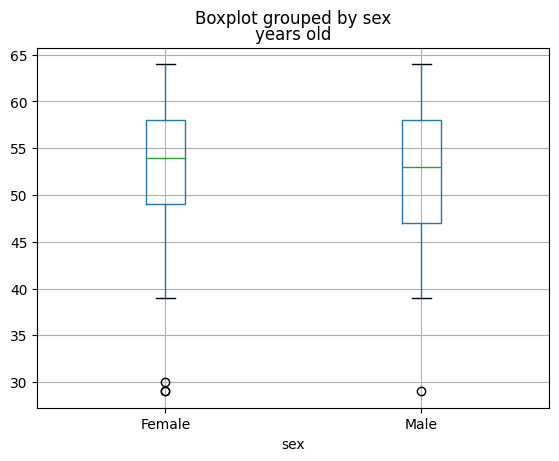

In [203]:
df.boxplot(column= 'years old', by= 'sex');

### Height

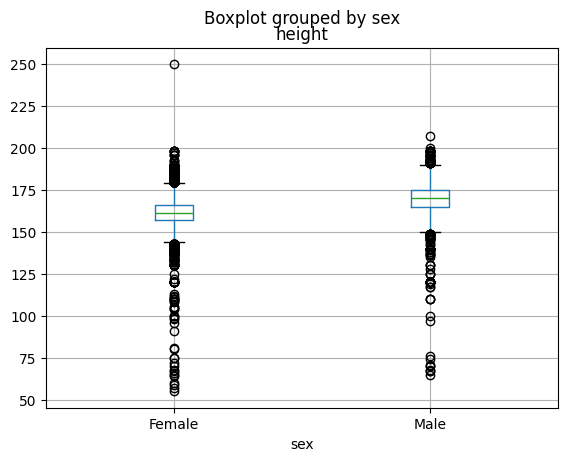

In [204]:
#vamos direto para o boxplot, pra investigar algumas coisas suspeitas. Height está em cm.
df.boxplot(column= 'height', by= 'sex');

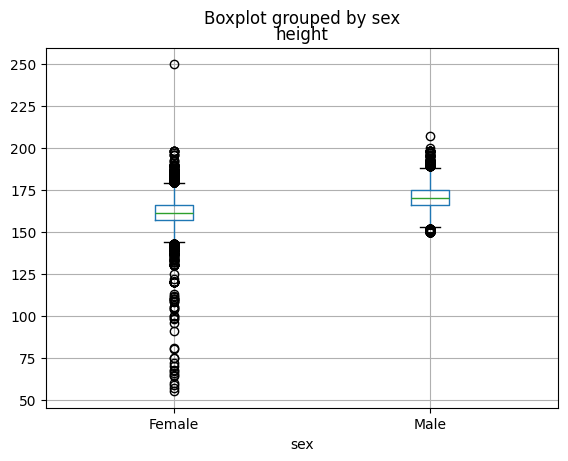

In [205]:
#Muito estranho, mulher com 250 cm de altura e uma galera com altura abaixo de 150. Definir outliers e remover.

mask_outliers_height_male = (df['height'] < 150 ) & (df['sex'] == 'Male') #removendo homens mais baixos que 150 cm
outliers_height_male= df[mask_outliers_height_male]
df = df[~mask_outliers_height_male]
df.boxplot(column= 'height', by= 'sex');


C:\Users\Gabriel\AppData\Local\Temp\ipykernel_22052\775213860.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


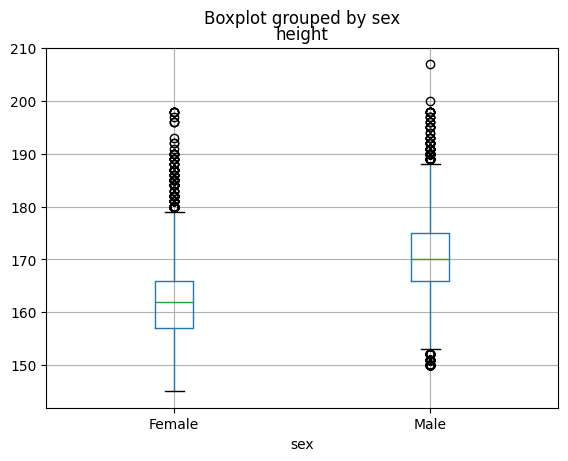

In [206]:
mask_outliers_max_height_female = (df['height'] > 200) & (df['sex'] == 'Female')  #removendo mulheres mais altas que 200 cm
mask_outliers_min_height_female = (df['height'] < 145) & (df['sex'] == 'Female') #removendo mulheres mais baixas que 145 cm
outliers_height_female = [df[mask_outliers_max_height_female], df[mask_outliers_min_height_female]]
outliers_height_female = pd.concat(outliers_height_female)
df = df[~mask_outliers_max_height_female]
df = df[~mask_outliers_min_height_female]
df.boxplot(column= 'height', by= 'sex');

### Weight

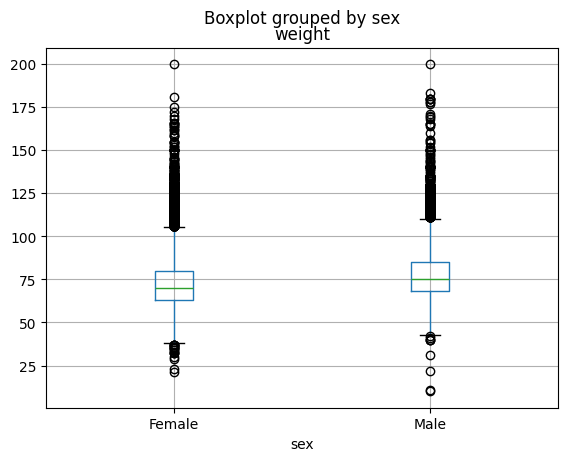

In [207]:
#continuando a investigação de outliers:

df.boxplot(column= 'weight', by= 'sex');

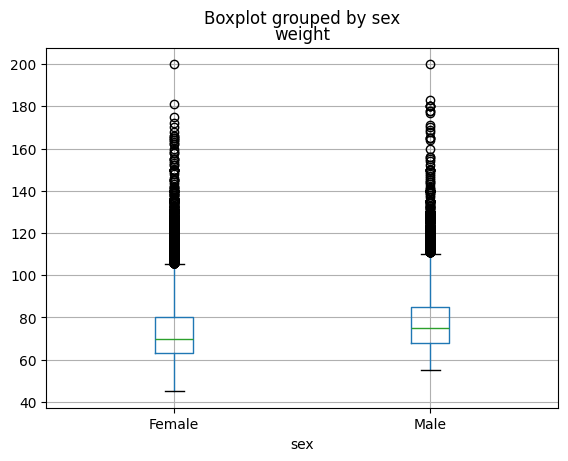

In [208]:
mask_outliers_weight_female = (df['weight'] < 45) & (df['sex'] == 'Female')  #removendo mulheres de peso abaixo do razoável
outliers_weight_female = df[mask_outliers_weight_female]
df = df[~mask_outliers_weight_female]
mask_outliers_weight_male = (df['weight'] < 55) & (df['sex'] == 'Male') #removendo homens de peso abaixo do razoável
outliers_weight_male = df[mask_outliers_weight_male]
df = df[~mask_outliers_weight_male]
df.boxplot(column= 'weight', by= 'sex');

### Pressão arterial

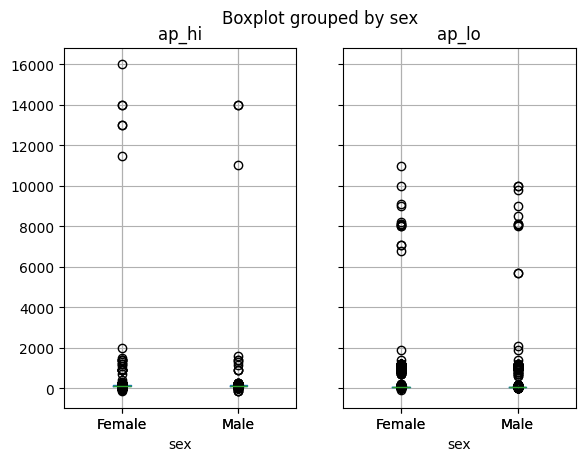

In [209]:
df.boxplot(column= ('ap_hi', 'ap_lo'), by= 'sex');

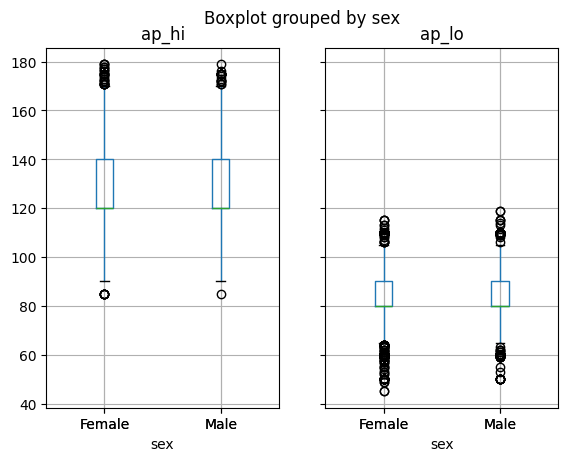

In [210]:
# idem, removendo valores que não são razoáveis
mask_ap_hi = (df['ap_hi'] < 180.0) & (df['ap_hi'] > 80.0)
outliers_ap_hi = df[~mask_ap_hi]
df = df[mask_ap_hi]
mask_ap_lo = (df['ap_lo'] < 120.0) & (df['ap_lo'] > 40.0)
outliers_ap_lo = df[~mask_ap_lo]
df = df[mask_ap_lo]
df.boxplot(column= ('ap_hi', 'ap_lo'), by= 'sex');

In [211]:
df.describe()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,smoke,years old
count,66487.000000,66487.000000,66487.000000,66487.000000,66487.000000,66487.000000,66487.000000,66487.000000,66487.000000,66487.000000
mean,49968.681081,19453.445034,1.344849,164.603562,74.325072,125.980372,81.072375,1.361484,0.086423,52.798081
std,28859.887065,2466.317753,0.475323,7.676516,13.948262,15.151357,8.903083,0.677107,0.280990,6.763979
min,0.000000,10798.000000,1.000000,145.000000,45.000000,85.000000,45.000000,1.000000,0.000000,29.000000
25%,24953.500000,17649.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,0.000000,48.000000
50%,50016.000000,19695.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,0.000000,53.000000
75%,74878.500000,21314.000000,2.000000,170.000000,82.000000,140.000000,90.000000,1.000000,0.000000,58.000000
max,99999.000000,23713.000000,2.000000,207.000000,200.000000,179.000000,119.000000,3.000000,1.000000,64.000000


### Cholesterol

In [212]:
#provavelmente trata-se de colesterol total, cujos níveis são healthy, at-risk e dangerous
#criar coluna com níveis;

def cholesterol_level_classifier(level):
    if level == 1:
        return 'Healthy'
    if level == 2:
        return 'At-risk'
    if level == 3:
        return 'Dangerous'

df['cholesterol class'] = df['cholesterol'].apply(cholesterol_level_classifier)
df



,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,smoke,sex,years old,cholesterol class
0,0,18393,2,168,62.0,110,80,1,0,Male,50,Healthy
1,1,20228,1,156,85.0,140,90,3,0,Female,55,Dangerous
2,2,18857,1,165,64.0,130,70,3,0,Female,51,Dangerous
3,3,17623,2,169,82.0,150,100,1,0,Male,48,Healthy
4,4,17474,1,156,56.0,100,60,1,0,Female,47,Healthy
...,...,...,...,...,...,...,...,...,...,...,...,...
69994,99992,21074,1,165,80.0,150,80,1,0,Female,57,Healthy
69995,99993,19240,2,168,76.0,120,80,1,1,Male,52,Healthy
69996,99995,22601,1,158,126.0,140,90,2,0,Female,61,At-risk
69998,99998,22431,1,163,72.0,135,80,1,0,Female,61,Healthy


In [213]:
df

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,smoke,sex,years old,cholesterol class
0,0,18393,2,168,62.0,110,80,1,0,Male,50,Healthy
1,1,20228,1,156,85.0,140,90,3,0,Female,55,Dangerous
2,2,18857,1,165,64.0,130,70,3,0,Female,51,Dangerous
3,3,17623,2,169,82.0,150,100,1,0,Male,48,Healthy
4,4,17474,1,156,56.0,100,60,1,0,Female,47,Healthy
...,...,...,...,...,...,...,...,...,...,...,...,...
69994,99992,21074,1,165,80.0,150,80,1,0,Female,57,Healthy
69995,99993,19240,2,168,76.0,120,80,1,1,Male,52,Healthy
69996,99995,22601,1,158,126.0,140,90,2,0,Female,61,At-risk
69998,99998,22431,1,163,72.0,135,80,1,0,Female,61,Healthy


### Incorporando os dados de consumo de álcool por índice

In [214]:
df1 = pd.read_csv('cardio_alco.csv', sep=';') #leitura do arquivo com os dados de consumo de álcool
df1

,id,alco
0,44,0
1,45,0
2,46,0
3,47,0
4,49,0
...,...,...
56898,99949,0
56899,99950,0
56900,99951,0
56901,99952,0


In [215]:
df = pd.merge(left=df, right=df1, on='id', how='left')
df.fillna(0, inplace=True)
df

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,smoke,sex,years old,cholesterol class,alco
0,0,18393,2,168,62.0,110,80,1,0,Male,50,Healthy,0.0
1,1,20228,1,156,85.0,140,90,3,0,Female,55,Dangerous,0.0
2,2,18857,1,165,64.0,130,70,3,0,Female,51,Dangerous,0.0
3,3,17623,2,169,82.0,150,100,1,0,Male,48,Healthy,0.0
4,4,17474,1,156,56.0,100,60,1,0,Female,47,Healthy,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
66482,99992,21074,1,165,80.0,150,80,1,0,Female,57,Healthy,0.0
66483,99993,19240,2,168,76.0,120,80,1,1,Male,52,Healthy,0.0
66484,99995,22601,1,158,126.0,140,90,2,0,Female,61,At-risk,0.0
66485,99998,22431,1,163,72.0,135,80,1,0,Female,61,Healthy,0.0


In [216]:
#verificando algum índice com álcool = 1
mask_alco_true = df['alco']!=0
df[mask_alco_true]

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,smoke,sex,years old,cholesterol class,alco
59,81,20330,2,187,115.0,130,90,1,0,Male,55,Healthy,1.0
96,134,17363,1,167,71.0,120,80,2,0,Female,47,At-risk,1.0
127,180,21473,2,174,90.0,140,80,1,1,Male,58,Healthy,1.0
139,199,18068,1,160,90.0,130,90,1,0,Female,49,Healthy,1.0
151,213,16028,1,157,69.0,120,80,1,0,Female,43,Healthy,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
66399,99858,19475,2,171,65.0,120,80,1,1,Male,53,Healthy,1.0
66405,99864,21883,2,178,102.0,150,100,1,0,Male,59,Healthy,1.0
66415,99882,23281,1,164,98.0,140,90,2,0,Female,63,At-risk,1.0
66439,99933,19137,2,167,74.0,130,80,1,1,Male,52,Healthy,1.0


## Análise bi-variada

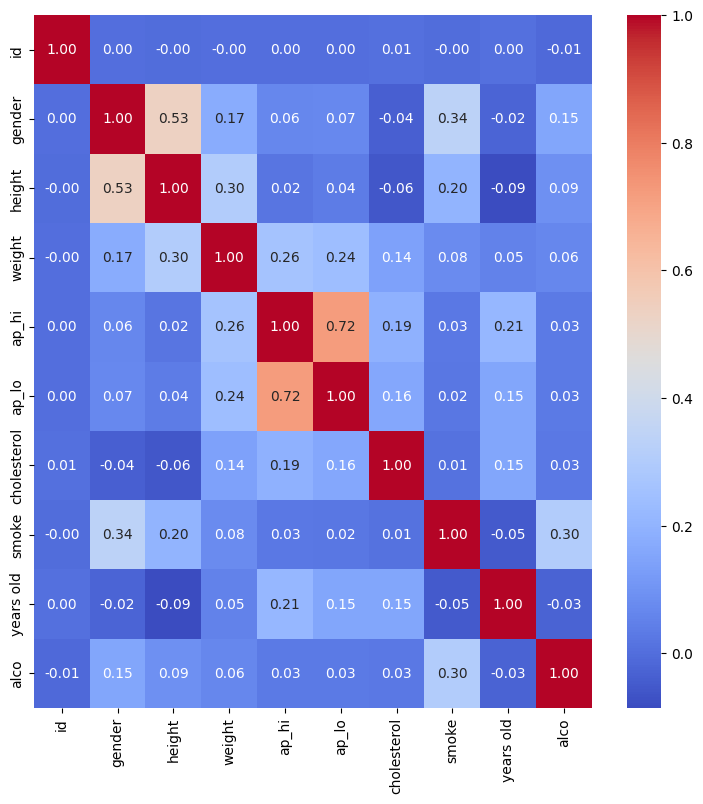

In [217]:
#dropando as colunas categórias somente para fazer a matriz de correlação
df_correlacao = df.drop('sex', axis = 1)
df_correlacao = df_correlacao.drop('cholesterol class', axis = 1)
df_correlacao = df_correlacao.drop('age', axis = 1)
df_correlacao

import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sns


corr_matrix = df_correlacao.corr(method = 'pearson') # Matriz de correlação
plt.figure(figsize=(9,9)) # Dimensionamento da figura
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt = '.2f') # Mapa de calor + Matriz
plt.show()

  * correlações moderadas:
      * gênero: altura
  
      
  * correlações fracas entre:
      * gênero: fumantes, consumo de álcool
      * altura: peso
      * peso: colesterol, pressões, altura
      * pressões: peso, colesterol, idade
      * colesterol: peso, pressões, idade
      * fumante: peso, altura, consumo de álcool
      * idade: pressões, colesterol


In [218]:
df_correlacao.corr()

,id,gender,height,weight,ap_hi,ap_lo,cholesterol,smoke,years old,alco
id,1.000000,0.002826,-0.001571,-0.000336,0.003488,0.000944,0.006750,-0.003758,0.003576,-0.013359
gender,0.002826,1.000000,0.533771,0.173387,0.064367,0.070101,-0.036550,0.337108,-0.023744,0.152757
height,-0.001571,0.533771,1.000000,0.304012,0.018378,0.035556,-0.058154,0.200137,-0.085516,0.088956
weight,-0.000336,0.173387,0.304012,1.000000,0.260498,0.240617,0.139759,0.076115,0.054393,0.063525
ap_hi,0.003488,0.064367,0.018378,0.260498,1.000000,0.720276,0.193203,0.025277,0.211581,0.029237
ap_lo,0.000944,0.070101,0.035556,0.240617,0.720276,1.000000,0.156256,0.023978,0.154273,0.030136
cholesterol,0.006750,-0.036550,-0.058154,0.139759,0.193203,0.156256,1.000000,0.009717,0.153326,0.028475
smoke,-0.003758,0.337108,0.200137,0.076115,0.025277,0.023978,0.009717,1.000000,-0.049696,0.304285
years old,0.003576,-0.023744,-0.085516,0.054393,0.211581,0.154273,0.153326,-0.049696,1.000000,-0.027809
alco,-0.013359,0.152757,0.088956,0.063525,0.029237,0.030136,0.028475,0.304285,-0.027809,1.000000


## Outliers

In [219]:
outliers_height_male

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,smoke,sex,years old
224,309,21800,2,76,55.0,120,80,1,0,Male,59
715,1010,20219,2,146,45.0,120,80,1,0,Male,55
2412,3399,22629,2,138,52.0,140,100,1,0,Male,61
4910,6950,23276,2,146,106.0,140,80,3,0,Male,63
6821,9721,21405,2,120,80.0,140,80,2,0,Male,58
...,...,...,...,...,...,...,...,...,...,...,...
66479,94906,16928,2,110,90.0,110,90,1,0,Male,46
68325,97579,19491,2,140,57.0,130,90,1,0,Male,53
69052,98630,20401,2,120,80.0,140,90,1,0,Male,55
69124,98728,16050,2,138,60.0,110,80,1,0,Male,43


In [220]:
outliers_height_female

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,smoke,sex,years old
6486,9223,21220,1,250,86.0,140,100,3,0,Female,58
249,343,18220,1,142,61.0,120,80,1,0,Female,49
360,506,19803,1,144,44.0,130,80,1,0,Female,54
391,555,18178,1,144,59.0,120,80,2,0,Female,49
781,1086,23301,1,141,60.0,120,80,1,0,Female,63
...,...,...,...,...,...,...,...,...,...,...,...
68804,98303,21806,1,143,56.0,140,80,1,0,Female,59
69430,99172,19040,1,140,52.0,150,80,2,0,Female,52
69708,99562,21357,1,144,115.0,140,90,1,0,Female,58
69784,99673,17541,1,141,44.0,100,70,1,0,Female,48


In [221]:
outliers_weight_female

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,smoke,sex,years old
383,543,19517,1,147,41.0,80,50,1,0,Female,53
837,1168,14659,1,148,42.0,90,60,1,0,Female,40
1574,2230,19840,1,163,43.0,120,80,1,0,Female,54
2262,3187,15285,1,152,40.0,110,60,1,0,Female,41
2472,3490,14829,1,152,40.0,120,80,1,0,Female,40
...,...,...,...,...,...,...,...,...,...,...,...
69520,99290,18195,1,151,43.0,100,70,1,0,Female,49
69522,99292,19770,1,155,43.0,120,80,1,0,Female,54
69734,99600,22505,1,156,43.0,150,100,1,0,Female,61
69851,99765,14683,1,150,42.0,90,60,1,0,Female,40


In [222]:
outliers_weight_male

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,smoke,sex,years old
23,33,23376,2,156,45.0,110,60,1,0,Male,64
107,142,14499,2,164,48.0,110,70,1,1,Male,39
108,143,15440,2,174,54.0,130,80,2,0,Male,42
125,170,19656,2,153,47.0,130,80,3,1,Male,53
185,252,21305,2,157,51.0,120,80,1,1,Male,58
...,...,...,...,...,...,...,...,...,...,...,...
69244,98901,20564,2,164,52.0,120,80,2,0,Male,56
69468,99219,16824,2,165,52.0,110,70,1,0,Male,46
69622,99440,19006,2,161,52.0,100,60,1,1,Male,52
69697,99551,23224,2,151,45.0,120,70,3,1,Male,63


In [223]:
outliers_ap_hi

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,smoke,sex,years old
59,74,20431,1,164,64.0,180,90,1,1,Female,55
61,79,20960,2,165,75.0,180,90,3,0,Male,57
101,136,18718,1,167,80.0,190,90,2,0,Female,51
209,288,18169,2,172,62.0,80,70,1,0,Male,49
230,318,23376,2,175,75.0,180,100,3,1,Male,64
...,...,...,...,...,...,...,...,...,...,...,...
69587,99398,23223,1,169,101.0,180,110,1,0,Female,63
69593,99405,16781,2,179,93.0,180,100,1,0,Male,45
69830,99734,22552,2,163,67.0,180,100,2,0,Male,61
69894,99835,16857,1,160,70.0,200,100,1,0,Female,46


In [224]:
outliers_ap_lo

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,smoke,sex,years old
228,314,17489,2,183,98.0,160,1100,1,1,Male,47
241,334,21932,2,157,60.0,160,1000,2,0,Male,60
260,357,18217,1,150,83.0,140,800,1,0,Female,49
329,458,23407,1,176,63.0,160,1000,2,0,Female,64
345,482,18704,1,154,81.0,140,1000,2,0,Female,51
...,...,...,...,...,...,...,...,...,...,...,...
69771,99659,23330,1,167,81.0,160,1000,1,0,Female,63
69872,99798,21808,1,152,56.0,160,1000,1,0,Female,59
69878,99807,21239,2,168,95.0,160,1000,1,0,Male,58
69885,99816,22417,2,166,78.0,170,1000,1,0,Male,61
